## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import pandas as pd

## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

In [2]:
# train = np.loadtxt('synth_train.txt')
# test = np.loadtxt('synth_test.txt')

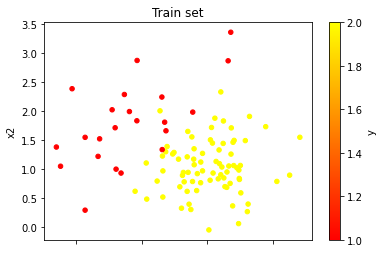

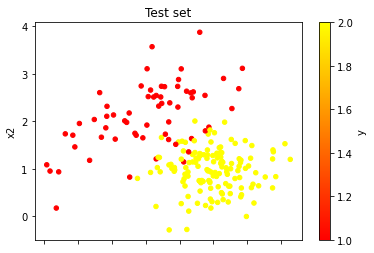

In [3]:
# We plot our data
train = pd.DataFrame(data=np.loadtxt('synth_train.txt'), columns=["y","x1","x2"])
train.plot.scatter(x="x1",y="x2",c="y",colormap='autumn',title='Train set')
test = pd.DataFrame(data=np.loadtxt('synth_test.txt'), columns=["y","x1","x2"])
test.plot.scatter(x="x1",y="x2",c="y",colormap='autumn',title='Test set')

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.

## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_

```
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,3.5,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
#N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

# For graphical representation  use code below for instance :
class_L = ...
plt.imshow(class_L, extent = (np.min(x1),np.max(x1),np.min(x2),np.max(x2)) )
plt.show()
```

### Constants computation

In [4]:
# We define notations
X_train = train[['x1','x2']].transpose() # we transpose to fit the lecture notations
Y_train = train['y'].transpose()
Y_train1 = Y_train[Y_train==1.0]
Y_train2 = Y_train[Y_train==2.0]
X_train1 = train[Y_train==1.0][['x1','x2']].transpose()
X_train2 = train[Y_train==2.0][['x1','x2']].transpose()
index1 = train[Y_train==1.0].index
index2 = train[Y_train==2.0].index

In [5]:
# We compute the weights of the classes
pi_2, pi_1 = Y_train.value_counts()/len(Y_train)
print(pi_1, pi_2)

0.22 0.78


In [6]:
# We compute the means of the classes
mu_1 = X_train1.mean(axis=1)
mu_2 = X_train2.mean(axis=1)
print(mu_1)
print(mu_2)

x1   -1.183507
x2    1.786554
dtype: float64
x1    0.028690
x2    1.044245
dtype: float64


In [7]:
# We compute the covariance matrix of the classes
S_1 = (X_train1.transpose() - mu_1.transpose()).transpose()
S_1 = np.dot(S_1,S_1.transpose())
S_1 = S_1 / len(index1)
S_2 = (X_train2.transpose() - mu_2.transpose()).transpose()
S_2 = np.dot(S_2,S_2.transpose())
S_2 = S_2 / len(index2)
print(S_1)
print(S_2)

[[0.51664642 0.30792087]
 [0.30792087 0.48765965]]
[[0.24283742 0.01935998]
 [0.01935998 0.20883663]]


In [8]:
# We compute the common averaged covariance
S = pi_1*S_1+pi_2*S_2
print(S)

[[0.3030754  0.08284337]
 [0.08284337 0.27017769]]


### LDA

In [9]:
# We compute the log probabilities
y_1 = np.dot(np.dot(X_train.transpose(),la.inv(S)), mu_1) - 0.5*np.dot(np.dot(mu_1.transpose(),la.inv(S)), mu_1)+np.log(pi_1)
y_2 = np.dot(np.dot(X_train.transpose(),la.inv(S)), mu_2) - 0.5*np.dot(np.dot(mu_2.transpose(),la.inv(S)), mu_2)+np.log(pi_2)

In [10]:
# We compute the decision function
f_train = y_1 - y_2

for i in range(len(f_train)):
    if f_train[i] > 0 :
        f_train[i] = 1
    else:
        f_train[i] = 2
print(f_train)

[1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.
 1. 1. 2. 1.]


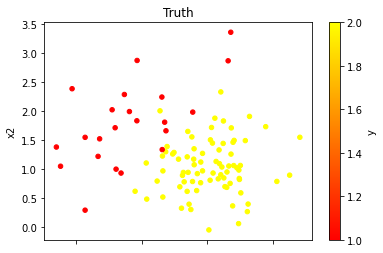

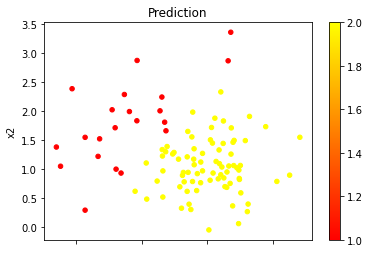

In [11]:
# We plot the results
train = pd.DataFrame(data=np.loadtxt('synth_train.txt'), columns=["y","x1","x2"])
train.plot.scatter(x="x1",y="x2",c="y",colormap='autumn',title='Truth')
train = pd.DataFrame(data=np.loadtxt('synth_train.txt'), columns=["y","x1","x2"])
train.plot.scatter(x="x1",y="x2",c=f_train,colormap='autumn',title='Prediction')

In [12]:
# We compute the decision boundary on a grid
import matplotlib.pyplot as plt
xmin = np.min([np.min(train.x1),np.min(test.x1)])
xmax = np.max([np.max(train.x1),np.max(test.x1)])
ymin = np.min([np.min(train.x2),np.min(test.x2)])
ymax = np.max([np.max(train.x2),np.max(test.x2)])
N = 50
x = np.linspace(xmin,xmax,N)
y = np.linspace(ymin,ymax,N)
X,Y = np.meshgrid(x,y)
#plt.scatter(X,Y)
data = [[concatenate(X)[i],concatenate(Y)[i]] for i in range(len(concatenate(X)))]
pts = pd.DataFrame(data = data, columns=["x1","x2"]).transpose()

In [13]:
y_1 = np.dot(np.dot(pts.transpose(),la.inv(S)), mu_1) - 0.5*np.dot(np.dot(mu_1.transpose(),la.inv(S)), mu_1)+np.log(pi_1)
y_2 = np.dot(np.dot(pts.transpose(),la.inv(S)), mu_2) - 0.5*np.dot(np.dot(mu_2.transpose(),la.inv(S)), mu_2)+np.log(pi_2)

In [14]:
f_bound = y_1 - y_2

for i in range(len(f_bound)):
    if f_bound[i] > 0 :
        f_bound[i] = 1
    else:
        f_bound[i] = 2

Text(0.5, 1.0, 'Training set')

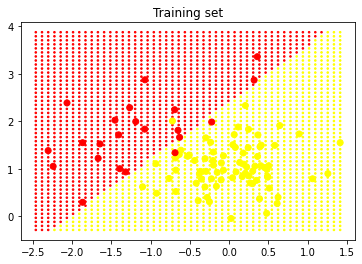

In [15]:
# We plot the original data, with the decision boundary
plt.scatter(pts.transpose().x1, pts.transpose().x2, c = f_bound, cmap='autumn', s = 10, marker = '.')
plt.scatter(train.x1, train.x2, c = train.y, cmap='autumn')
plt.title("Training set")

Text(0.5, 1.0, 'Test set')

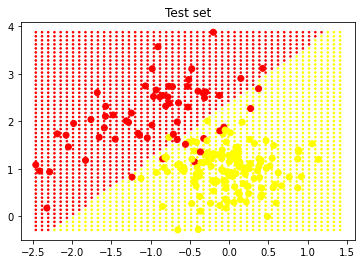

In [16]:
# We do the same for the test set
X_test = test[['x1','x2']].transpose()
Y_test = test['y'].transpose()
Y_test1 = Y_test[Y_test==1.0]
Y_test2 = Y_test[Y_test==2.0]
X_test1 = test[Y_test==1.0][['x1','x2']].transpose()
X_test2 = test[Y_test==2.0][['x1','x2']].transpose()
index1 = test[Y_test==1.0].index
index2 = test[Y_test==2.0].index

y_1 = np.dot(np.dot(X_test.transpose(),la.inv(S)), mu_1) - 0.5*np.dot(np.dot(mu_1.transpose(),la.inv(S)), mu_1)+np.log(pi_1)
y_2 = np.dot(np.dot(X_test.transpose(),la.inv(S)), mu_2) - 0.5*np.dot(np.dot(mu_2.transpose(),la.inv(S)), mu_2)+np.log(pi_2)

f_test = y_1 - y_2

for i in range(len(f_test)):
    if f_test[i] > 0 :
        f_test[i] = 1
    else:
        f_test[i] = 2

plt.scatter(pts.transpose().x1, pts.transpose().x2, c = f_bound, cmap='autumn', s = 10, marker = '.')
plt.scatter(test.x1, test.x2, c = test.y, cmap='autumn')
plt.title("Test set")

In [17]:
# We compute the error rates
e_train = sum(np.abs(f_train-train.y))/len(train.y)
e_test = sum(np.abs(f_test-test.y))/len(test.y)
print(e_train)
print(e_test)

0.03
0.055


### QDA

In [18]:
# We compute the log probabilities

A = (X_train.transpose() - mu_1.transpose())
y_1 = []
for n in range(len(A)):
    x = A.transpose()[n]
    p = -0.5*np.dot(np.dot(np.transpose(x), la.inv(S_1)),x) + np.log(pi_1) - 0.5*np.log(la.det(S_1))
    y_1.append(p)

B = (X_train.transpose() - mu_2.transpose())
y_2 = []
for n in range(len(B)):
    x = B.transpose()[n]
    p = -0.5*np.dot(np.dot(np.transpose(x), la.inv(S_2)),x) + np.log(pi_2) - 0.5*np.log(la.det(S_2))
    y_2.append(p)

In [19]:
# We compute the decision function

f_train = np.array(y_1) - np.array(y_2)

for i in range(len(f_train)):
    if f_train[i] > 0 :
        f_train[i] = 1
    else:
        f_train[i] = 2
        
print(f_train)

[1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1.
 1. 1. 2. 1.]


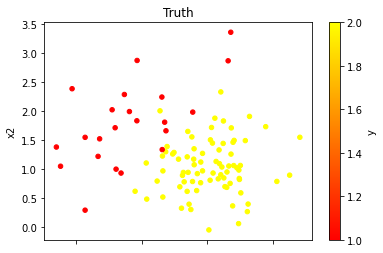

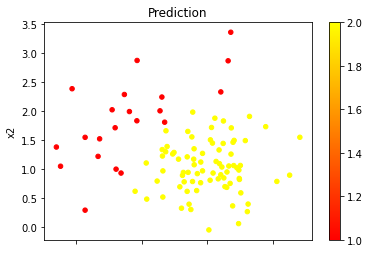

In [20]:
# We plot the results
train = pd.DataFrame(data=np.loadtxt('synth_train.txt'), columns=["y","x1","x2"])
train.plot.scatter(x="x1",y="x2",c="y",colormap='autumn',title='Truth')
train = pd.DataFrame(data=np.loadtxt('synth_train.txt'), columns=["y","x1","x2"])
train.plot.scatter(x="x1",y="x2",c=f_train,colormap='autumn',title='Prediction')

In [21]:
# We compute the boundary on a grid

A = (pts.transpose() - mu_1.transpose())
y_1 = []
for n in range(len(A)):
    x = A.transpose()[n]
    p = -0.5*np.dot(np.dot(np.transpose(x), la.inv(S_1)),x) + np.log(pi_1) - 0.5*np.log(la.det(S_1))
    y_1.append(p)

B = (pts.transpose() - mu_2.transpose())
y_2 = []
for n in range(len(B)):
    x = B.transpose()[n]
    p = -0.5*np.dot(np.dot(np.transpose(x), la.inv(S_2)),x) + np.log(pi_2) - 0.5*np.log(la.det(S_2))
    y_2.append(p)

f_bound = np.array(y_1) - np.array(y_2)

for i in range(len(f_bound)):
    if f_bound[i] > 0 :
        f_bound[i] = 1
    else:
        f_bound[i] = 2

Text(0.5, 1.0, 'Train set')

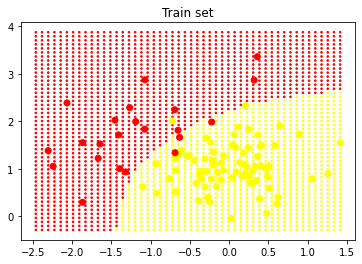

In [22]:
# We plot the original data and the boundary on a grid

plt.scatter(pts.transpose().x1, pts.transpose().x2, c = f_bound, cmap='autumn', s = 10, marker = '.')
plt.scatter(train.x1, train.x2, c = train.y, cmap='autumn')
plt.title("Train set")

Text(0.5, 1.0, 'Test set')

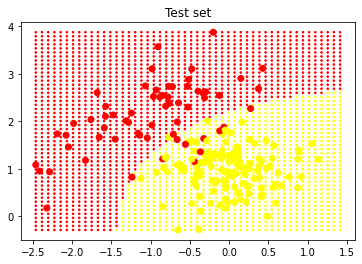

In [23]:
# We do the same of the test set

A = (X_test.transpose() - mu_1.transpose())
y_1 = []
for n in range(len(A)):
    x = A.transpose()[n]
    p = -0.5*np.dot(np.dot(np.transpose(x), la.inv(S_1)),x) + np.log(pi_1) - 0.5*np.log(la.det(S_1))
    y_1.append(p)

B = (X_test.transpose() - mu_2.transpose())
y_2 = []
for n in range(len(B)):
    x = B.transpose()[n]
    p = -0.5*np.dot(np.dot(np.transpose(x), la.inv(S_2)),x) + np.log(pi_2) - 0.5*np.log(la.det(S_2))
    y_2.append(p)

f_test = np.array(y_1) - np.array(y_2)

for i in range(len(f_test)):
    if f_test[i] > 0 :
        f_test[i] = 1
    else:
        f_test[i] = 2

plt.scatter(pts.transpose().x1, pts.transpose().x2, c = f_bound, cmap='autumn', s = 10, marker = '.')
plt.scatter(test.x1, test.x2, c = test.y, cmap='autumn')
plt.title("Test set")

In [24]:
# We compute the error rates
e_train = sum(np.abs(f_train-train.y))/len(train.y)
e_test = sum(np.abs(f_test-test.y))/len(test.y)
print(e_train)
print(e_test)

0.05
0.05


### Comparison

For LDA we found : 0.03 on the training set and 0.055 on the test set. \
For QDA we found : 0.05 on the training set and 0.05 on the test set.

So LDA is doing better on the training set, but QDA is better on the test set.

### KNN

In [25]:
from sklearn import neighbors

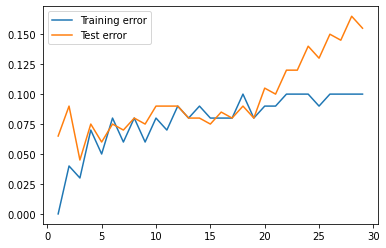

In [42]:
# We choose the best k parameter for knn

L_train = []
L_test = []
ks = range(1,30)

for k in ks:
    knn = neighbors.KNeighborsRegressor(k)
    knn.fit(X_train.transpose(), Y_train.astype(int))
    Y_hat_train = np.round(knn.predict(X_train.transpose()), 0)
    Y_hat_test = np.round(knn.predict(X_test.transpose()), 0)
    e_train = sum(np.abs(Y_hat_train-Y_train)/len(Y_train))
    e_test = sum(np.abs(Y_hat_test-Y_test)/len(Y_test))
    L_train.append(e_train)
    L_test.append(e_test)

plt.plot(ks,L_train)
plt.plot(ks,L_test)
plt.legend(['Training error', 'Test error'])

In [27]:
print(L_test.index(min(L_test))+1)

3


In [28]:
# We predict with the parameter we found
k = 3
knn = neighbors.KNeighborsRegressor(k)
knn.fit(X_train.transpose(), Y_train.astype(int))
Y_hat_train = np.round(knn.predict(X_train.transpose()), 0)
Y_hat_test = np.round(knn.predict(X_test.transpose()), 0)
Y_hat_pts = np.round(knn.predict(pts.transpose()), 0)

Text(0.5, 1.0, 'Training set')

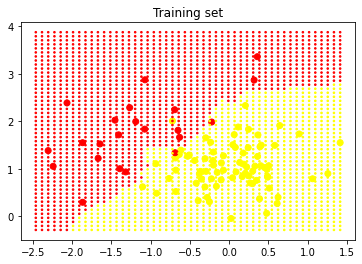

In [29]:
# We plot the result on the training set
plt.scatter(X_train.transpose().x1, X_train.transpose().x2, c = Y_train, cmap='autumn')
plt.scatter(pts.transpose().x1, pts.transpose().x2, c = Y_hat_pts, cmap='autumn', s = 10, marker = '.')
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

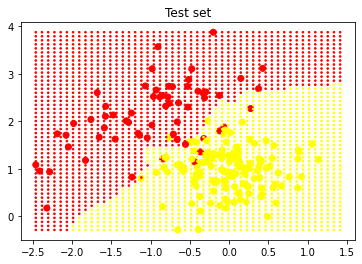

In [30]:
# We plot the result on the test set
plt.scatter(X_test.transpose().x1, X_test.transpose().x2, c = Y_test, cmap='autumn')
plt.scatter(pts.transpose().x1, pts.transpose().x2, c = Y_hat_pts, cmap='autumn', s = 10, marker = '.')
plt.title('Test set')

In [31]:
# We compute the error rates
e_train = sum(np.abs(Y_hat_train-Y_train)/len(Y_train))
Y_hat_test = np.round(knn.predict(X_test.transpose()), 0)
e_test = sum(np.abs(Y_hat_test-Y_test)/len(Y_test))
print(e_train)
print(e_test)

0.03
0.045


For LDA we found : 0.03 on the training set and 0.055 on the test set. \
For QDA we found : 0.05 on the training set and 0.05 on the test set.

We can see that KNN is doing better than both LDA and QDA for the training and test set.

## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [33]:
clf = lda()
clf.fit(X_train.transpose(), Y_train)
Y_hat_train = clf.predict(X_train.transpose())
Y_hat_test = clf.predict(X_test.transpose())
Y_hat_pts = clf.predict(pts.transpose())

Text(0.5, 1.0, 'Training set')

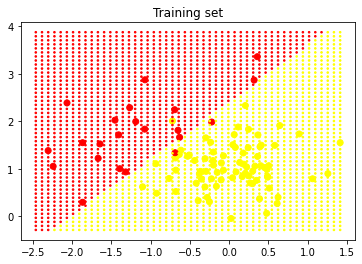

In [34]:
plt.scatter(X_train.transpose().x1, X_train.transpose().x2, c = Y_train, cmap='autumn')
plt.scatter(pts.transpose().x1, pts.transpose().x2, c = Y_hat_pts, cmap='autumn', s = 10, marker = '.')
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

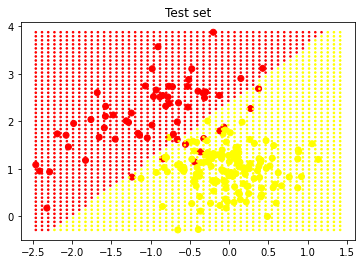

In [35]:
plt.scatter(X_test.transpose().x1, X_test.transpose().x2, c = Y_test, cmap='autumn')
plt.scatter(pts.transpose().x1, pts.transpose().x2, c = Y_hat_pts, cmap='autumn', s = 10, marker = '.')
plt.title('Test set')

In [36]:
e_train = sum(np.abs(Y_hat_train-Y_train)/len(Y_train))
e_test = sum(np.abs(Y_hat_test-Y_test)/len(Y_test))
print(e_train)
print(e_test)

0.03
0.05500000000000001


In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda

In [38]:
clf = qda()
clf.fit(X_train.transpose(), Y_train)
Y_hat_train = clf.predict(X_train.transpose())
Y_hat_test = clf.predict(X_test.transpose())
Y_hat_pts = clf.predict(pts.transpose())

Text(0.5, 1.0, 'Training set')

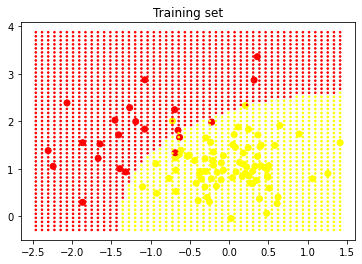

In [39]:
plt.scatter(X_train.transpose().x1, X_train.transpose().x2, c = Y_train, cmap='autumn')
plt.scatter(pts.transpose().x1, pts.transpose().x2, c = Y_hat_pts, cmap='autumn', s = 10, marker = '.')
plt.title('Training set')

Text(0.5, 1.0, 'Test set')

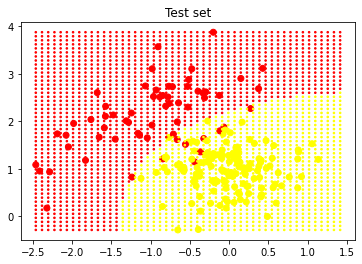

In [40]:
plt.scatter(X_test.transpose().x1, X_test.transpose().x2, c = Y_test, cmap='autumn')
plt.scatter(pts.transpose().x1, pts.transpose().x2, c = Y_hat_pts, cmap='autumn', s = 10, marker = '.')
plt.title('Test set')

In [41]:
e_train = sum(np.abs(Y_hat_train-Y_train)/len(Y_train))
e_test = sum(np.abs(Y_hat_test-Y_test)/len(Y_test))
print(e_train)
print(e_test)

0.05
0.05


We find exactly the same results as for our hand-written LDA and QDA.

In the example provided on sklearn website, we can see that the data on the second line is neither linearly separable nor quadratically seperable because they overlap each other, so the example is not very illustrative indeed.